In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style="whitegrid")

In [3]:
df= pd.read_csv('googleplaystore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#check if missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df = df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [10]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
#Create Visuals

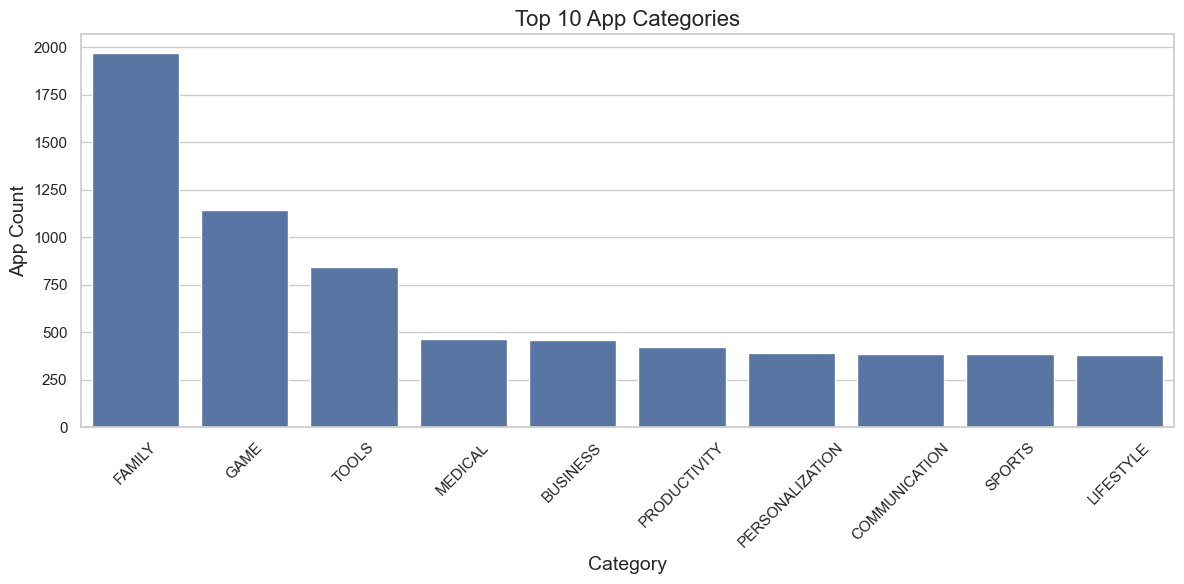

In [19]:
# Bar Plot
plt.figure(figsize=(12,6))
category_counts= df['Category'].value_counts().head(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 App Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('App Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#This bar chart shows the top 10 app categories by number of apps.
#The 'FAMILY' category clearly dominates with the highest number of apps, nearly double the second-highest category, 'GAME'.
#Other popular categories include 'TOOLS', 'MEDICAL', and 'BUSINESS'.
#This suggests that developers tend to create more apps in family and utility-focused categories, possibly because of broader target audiences or higher demand

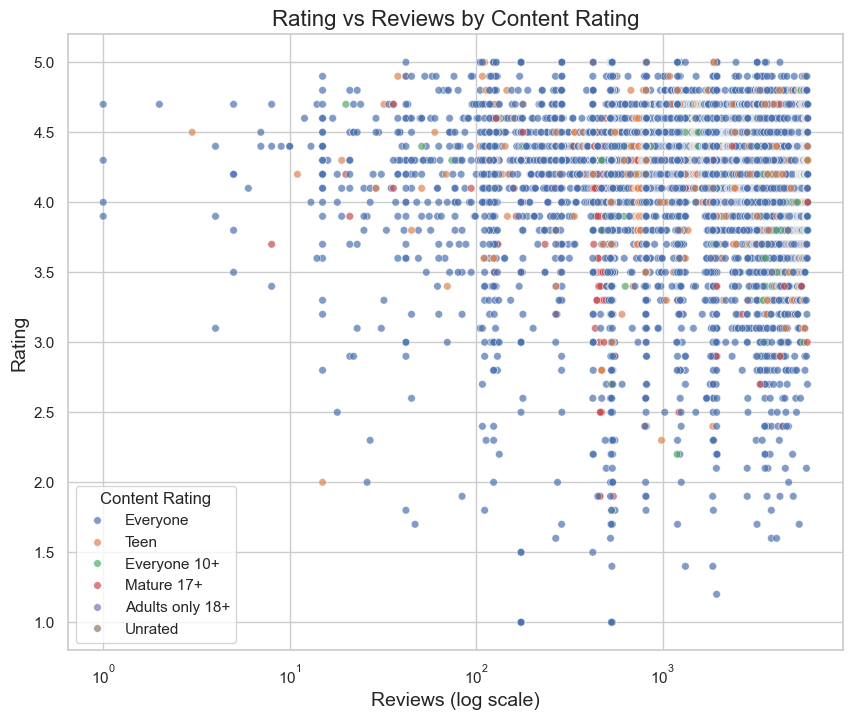

In [36]:
# Scatter Plot
import numpy as np

plt.figure(figsize=(10,8))
sns.scatterplot(x='Reviews', y='Rating', hue='Content Rating', data=df, alpha=0.7, s=30)
plt.title('Rating vs Reviews by Content Rating', fontsize=16)
plt.xlabel('Reviews (log scale)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xscale('log')
plt.legend(title='Content Rating')
plt.show()

In [42]:
#This scatter plot shows the relationship between app ratings and review counts, with data points colored by content rating (Everyone, Teen, etc).
#Most apps with high review counts also have high ratings (around 4.0–4.7), indicating strong user satisfaction.
#The x-axis uses a log scale because review counts vary greatly.
#Apps rated "Everyone" dominate the chart, showing that most apps are made for general audiences.
#There is no clear linear trend, but highly reviewed apps rarely have low ratings, suggesting a positive correlation between popularity and quality.

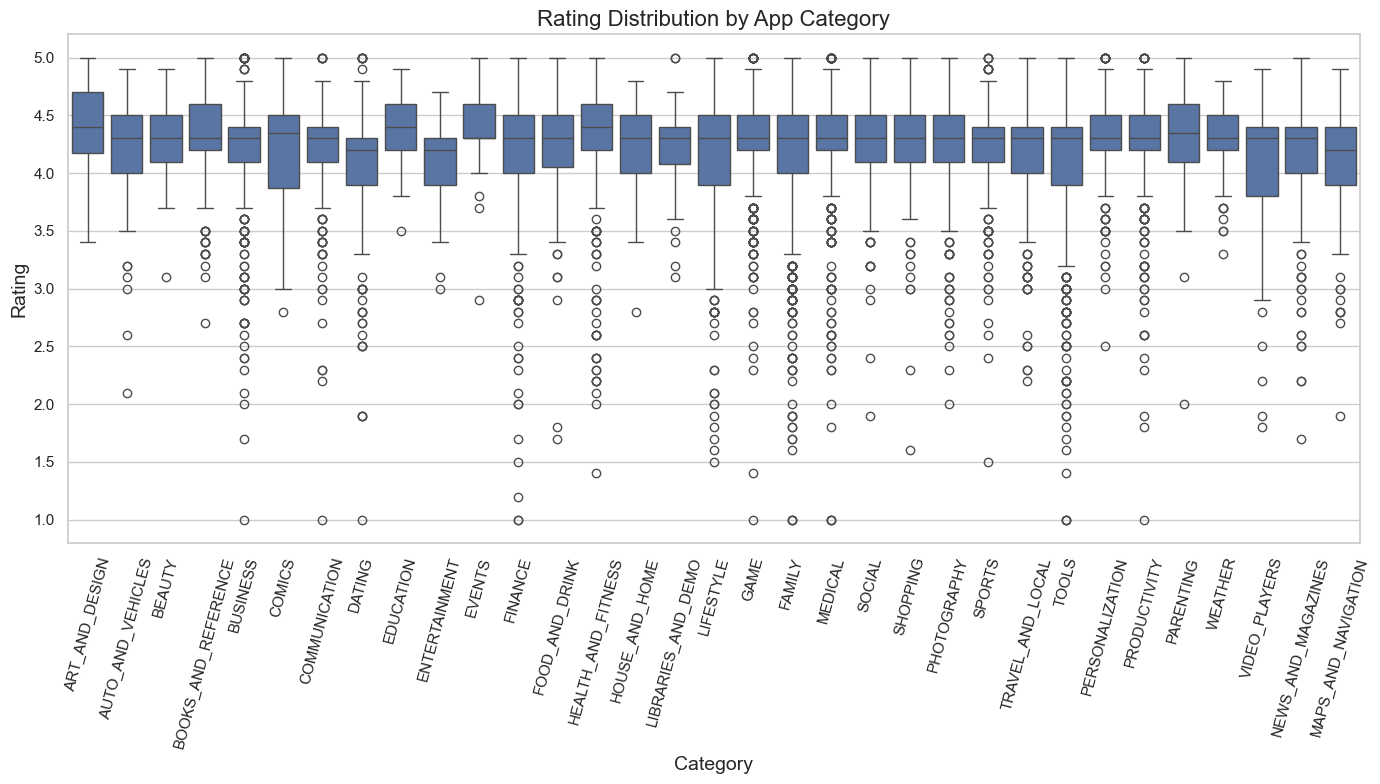

In [40]:
# Box Plot

plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Rating Distribution by App Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [43]:
#This box plot compares the distribution of ratings across different app categories.
#All categories have a median rating above 4.0, meaning overall user satisfaction is high.
#Some categories (like 'Tools') show a wider range and more outliers, which may indicate inconsistent quality or polarized user experiences.
#Categories like 'EDUCATION' have more stable and higher ratings, showing it may deliver more consistent value to users.